# Tina Rezvanian

 # Classification of Reuters newswires into 46 classes. using  TensorFlow Module Keras, i.e. tf.keras

In [53]:
import tensorflow as tf
import numpy as np

In [54]:
print(tf.__version__)
print(tf.keras.__version__)

2.1.0
2.2.4-tf


In [55]:
reuters = tf.keras.datasets.reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

"to_categorical" is imported from the "tensorflow.keras.utils" 

In [7]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [8]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

The model is created by tensorflow network as below:

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu',input_shape=(10000,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(46, activation='softmax')
])

The loss function uses the tensorflow's categororcal cross entropy function

In [10]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Tensorflow's sequential model also has fit function:

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 158us/sample - loss: 2.5282 - accuracy: 0.4830 - val_loss: 1.6872 - val_accuracy: 0.6200
Epoch 2/20
7982/7982 [==============================] - 1s 97us/sample - loss: 1.4166 - accuracy: 0.6946 - val_loss: 1.3312 - val_accuracy: 0.7100
Epoch 3/20
7982/7982 [==============================] - 1s 92us/sample - loss: 1.0781 - accuracy: 0.7623 - val_loss: 1.1577 - val_accuracy: 0.7400
Epoch 4/20
7982/7982 [==============================] - 1s 90us/sample - loss: 0.8568 - accuracy: 0.8182 - val_loss: 1.0500 - val_accuracy: 0.7670
Epoch 5/20
7982/7982 [==============================] - 1s 89us/sample - loss: 0.6833 - accuracy: 0.8577 - val_loss: 0.9794 - val_accuracy: 0.7850
Epoch 6/20
7982/7982 [==============================] - 1s 87us/sample - loss: 0.5457 - accuracy: 0.8854 - val_loss: 0.9372 - val_accuracy: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 92us/sampl

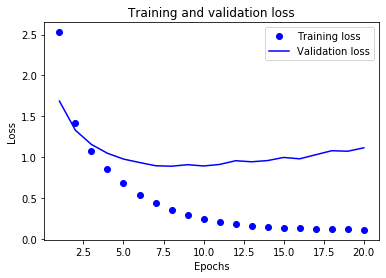

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

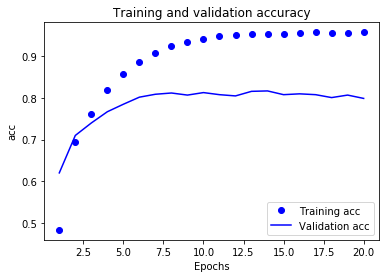

In [14]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

Jupyter Notebook 3.6-classifying-newswires.ipynb choosed the epoch = 8 to run the network.
This is the epoch after which the network starts overfitting because the validation accuracy decreases and training accuracy increase in a diverging fashion. 

In [15]:
# the model is migrated to tensorflow similar to above: 
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu',input_shape=(10000,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#  The epoch in the fit function is equal tp 8 to train a new network 
# from scratch for 8 epochs
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))






Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 167us/sample - loss: 2.5237 - accuracy: 0.5501 - val_loss: 1.6583 - val_accuracy: 0.6460
Epoch 2/8
7982/7982 [==============================] - 1s 97us/sample - loss: 1.3793 - accuracy: 0.7068 - val_loss: 1.2845 - val_accuracy: 0.7050
Epoch 3/8
7982/7982 [==============================] - 1s 85us/sample - loss: 1.0397 - accuracy: 0.7750 - val_loss: 1.1172 - val_accuracy: 0.7540
Epoch 4/8
7982/7982 [==============================] - 1s 79us/sample - loss: 0.8179 - accuracy: 0.8249 - val_loss: 1.0104 - val_accuracy: 0.7950
Epoch 5/8
7982/7982 [==============================] - 1s 79us/sample - loss: 0.6482 - accuracy: 0.8672 - val_loss: 0.9552 - val_accuracy: 0.8000
Epoch 6/8
7982/7982 [==============================] - 1s 79us/sample - loss: 0.5101 - accuracy: 0.8944 - val_loss: 0.9432 - val_accuracy: 0.7890
Epoch 7/8
7982/7982 [==============================] - 1s 82us/sample - los

In [16]:
# Then the model performance is evaluated on the test data:
    
results = model.evaluate(x_test, one_hot_test_labels)

# the results are printed: results include
# loss and accuracy for the test data:
print('\nLoss on test data,', results[0],'\nAccuracy on test data,', results[1])

2246/2246 [==============================] - 0s 54us/sample - loss: 1.0098 - accuracy: 0.7778

Loss on test data, 1.0098355281384843 
Accuracy on test data, 0.77782726


In [17]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18432769367764915

In [18]:
# then the test lables are predicted, tensorflow has predict function
predictions = model.predict(x_test)

In [19]:
predictions[0].shape

(46,)

In [20]:
np.sum(predictions[0])

1.0000004

In [21]:
np.argmax(predictions[0])

3

In [22]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [23]:
# the model is compiled using tensorflow's sparse categorical cross entropy
model.compile(optimizer='rmsprop', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])


In [24]:

# here notebook 3.6 is experimenting by making the bachsize = 128
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu',input_shape=(10000,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 192us/sample - loss: 1.8918 - accuracy: 0.6161 - val_loss: 1.3204 - val_accuracy: 0.6930
Epoch 2/20
7982/7982 [==============================] - 1s 138us/sample - loss: 0.9940 - accuracy: 0.7820 - val_loss: 1.0938 - val_accuracy: 0.7540
Epoch 3/20
7982/7982 [==============================] - 1s 128us/sample - loss: 0.6754 - accuracy: 0.8548 - val_loss: 0.9286 - val_accuracy: 0.8080
Epoch 4/20
7982/7982 [==============================] - 1s 180us/sample - loss: 0.4676 - accuracy: 0.9018 - val_loss: 0.9515 - val_accuracy: 0.8080
Epoch 5/20
7982/7982 [==============================] - 1s 133us/sample - loss: 0.3370 - accuracy: 0.9268 - val_loss: 0.9126 - val_accuracy: 0.8090
Epoch 6/20
7982/7982 [==============================] - 1s 127us/sample - loss: 0.2605 - accuracy: 0.9400 - val_loss: 0.8957 - val_accuracy: 0.8200
Epoch 7/20
7982/7982 [==============================] - 1s 130us

Determining the optimal number of epochs by training the model with one training set of 7982 samples and one validation set of 1000 samples. Runing with  model for 20 epochs.


In [26]:
len(x_train)

8982

x_train has 8982 records, the first 1000 records is used for validation and the remaing (8982 -1000 = 7982) is used for training the model. Similarly for labels. 

In [40]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [41]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu',input_shape=(10000,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [42]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 150us/sample - loss: 2.5562 - accuracy: 0.5247 - val_loss: 1.7064 - val_accuracy: 0.6380
Epoch 2/20
7982/7982 [==============================] - 1s 93us/sample - loss: 1.3926 - accuracy: 0.7062 - val_loss: 1.2852 - val_accuracy: 0.7200
Epoch 3/20
7982/7982 [==============================] - 1s 92us/sample - loss: 1.0393 - accuracy: 0.7754 - val_loss: 1.1176 - val_accuracy: 0.7500
Epoch 4/20
7982/7982 [==============================] - 1s 89us/sample - loss: 0.8188 - accuracy: 0.8208 - val_loss: 1.0038 - val_accuracy: 0.7810
Epoch 5/20
7982/7982 [==============================] - 1s 82us/sample - loss: 0.6512 - accuracy: 0.8628 - val_loss: 0.9720 - val_accuracy: 0.7880
Epoch 6/20
7982/7982 [==============================] - 1s 85us/sample - loss: 0.5187 - accuracy: 0.8896 - val_loss: 0.9706 - val_accuracy: 0.7870
Epoch 7/20
7982/7982 [==============================] - 1s 82us/sampl

In [52]:
print('The validatoion accuracy after running for 20 epochs is 0.8070' )

The validatoion accuracy after running for 20 epochs is 0.8070


In [44]:
# Then the model performance is evaluated on the test data:
    
results = model.evaluate(x_test, one_hot_test_labels)

# the results are printed: results include
# loss and accuracy for the test data:
print('\nLoss on test data after running for 20 epochs,', results[0],'\nAccuracy on test data after running for 20 epochs,', results[1])


2246/2246 [==============================] - 0s 59us/sample - loss: 1.2139 - accuracy: 0.7854

Loss on test data after running for 20 epochs, 1.213893431377326 
Accuracy on test data after running for 20 epochs, 0.7853963


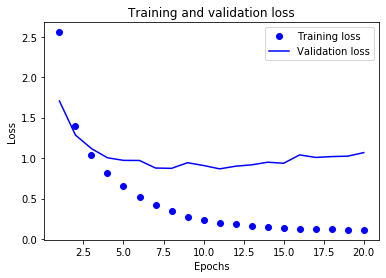

In [45]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

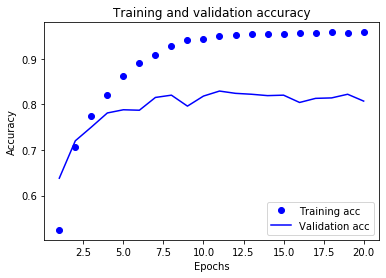

In [46]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [47]:
val_acc

[0.638,
 0.72,
 0.75,
 0.781,
 0.788,
 0.787,
 0.815,
 0.82,
 0.796,
 0.818,
 0.829,
 0.824,
 0.822,
 0.819,
 0.82,
 0.804,
 0.813,
 0.814,
 0.822,
 0.807]

Determining the optimal number of epochs and report the accuracy of the model when trained with the optimal number of epochs.


- Based on the printed history and the figures above, the val_accuracy and training accuracy seem be diverging around 8 and 9. after epoch 8 or 9 the model is slighly overfitting. this is where the validation accuracy is peaked and the validation loss is at minimum. Therefor,  the optimal number of epoch is 8 , and I reruning the network for epoch = 8 



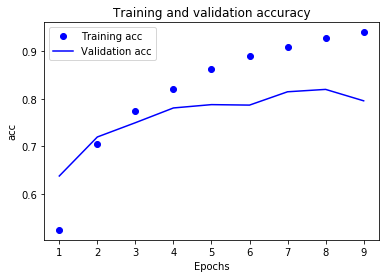

In [48]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 10)
plt.plot(epochs, acc[:9], 'bo', label='Training acc')
plt.plot(epochs, val_acc[:9], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

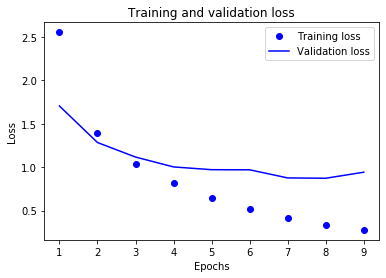

In [49]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 10)

plt.plot(epochs, loss[:9], 'bo', label='Training loss')
plt.plot(epochs, val_loss[:9], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [50]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu',input_shape=(10000,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# I choose epoch = 8 because accuracy peaks at this point and loss is also the minumum
model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 140us/sample - loss: 2.5189 - accuracy: 0.5306 - val_loss: 1.6561 - val_accuracy: 0.6490
Epoch 2/8
7982/7982 [==============================] - 1s 86us/sample - loss: 1.3875 - accuracy: 0.7108 - val_loss: 1.2902 - val_accuracy: 0.7240
Epoch 3/8
7982/7982 [==============================] - 1s 89us/sample - loss: 1.0414 - accuracy: 0.7772 - val_loss: 1.1147 - val_accuracy: 0.7580
Epoch 4/8
7982/7982 [==============================] - 1s 95us/sample - loss: 0.8184 - accuracy: 0.8241 - val_loss: 1.0649 - val_accuracy: 0.7600
Epoch 5/8
7982/7982 [==============================] - 1s 87us/sample - loss: 0.6494 - accuracy: 0.8606 - val_loss: 0.9572 - val_accuracy: 0.7980
Epoch 6/8
7982/7982 [==============================] - 1s 87us/sample - loss: 0.5185 - accuracy: 0.8886 - val_loss: 0.8974 - val_accuracy: 0.8110
Epoch 7/8
7982/7982 [==============================] - 1s 90us/sample - los

In [51]:
# Then the model performance is evaluated on the test data:
    
results = model.evaluate(x_test, one_hot_test_labels)

# the results are printed: results include
# loss and accuracy for the test data:
print('\nLoss on test data after running for 8 epochs,', 
      results[0],'\nAccuracy on test data after running for 8 epochs,', results[1])


2246/2246 [==============================] - 0s 67us/sample - loss: 0.9927 - accuracy: 0.7818

Loss on test data after running for 8 epochs, 0.9926807719049768 
Accuracy on test data after running for 8 epochs, 0.78183436


# Personal Computer information:
    - processor: 2.3 GHz Intel Core i9, it has 8 cores
    - Graphics:Intel UHD Graphics 630 1536 MB
    - Memory: 16 GB 2400 MHz DDR4
    - no GPUs
        

# AWS Computer Information:
- runing above code on an AMI on AWS. Deep Learning AMI (Amazon Linux) Version 26.0 - ami-02bd97932dabc037b or Deep Learning AMI (Ubuntu 18.04) Version 26.0 - ami-0698bcaf8bd9ef56d. Select a machine with 8 or 16 CPU-s. make sure you stop and terminate your instance in AWS. 

# Comparison:
- The Execution Time of AWS was 18.6922471523284 seconds, and the my computer's exetution time is 27.833515882492065 seconds. AWS takes ~ 9.1413 seconds less than my computer. 



Determining the accuracy of the model using 4 fold validation. 


- Model accuracy should be considered the average accuracy of all 4 training runs with one of 4 validation sets. Compare this accuracy with the accuracy obtain in Problem 2.


In [56]:
#  a function is creating for building model that includes the tensorflow nework 
# and the compile function of model


def build_model():

    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu',input_shape=(10000,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
    ])
    model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
    return model

In [57]:
#  the samples in x_train is divided into 4 sections,
# and in each iteration one of the 4 sections is the validation set


k = 4
num_val_samples = len(x_train) // k
num_epochs = 8
all_scores = []
all_loss =[]
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = one_hot_train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [x_train[:i * num_val_samples],
         x_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [one_hot_train_labels[:i * num_val_samples],
         one_hot_train_labels[(i + 1) * num_val_samples:]],
        axis=0)
    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, 
              batch_size=512, verbose=0)
    # Evaluate the model on the validation data
    val_loss, val_accuracy = model.evaluate(val_data, val_targets,verbose=0)
    all_scores.append(val_accuracy)
    all_loss.append(val_loss)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


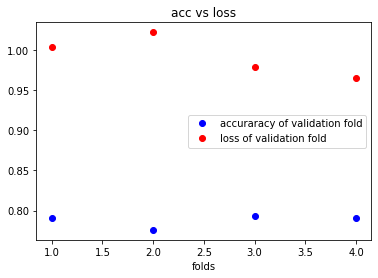

In [59]:
plt.clf()   # clear figure
acc = all_scores
loss = all_loss
fold = range(1, k+1)
plt.plot(fold, acc, 'bo', label='accuraracy of validation fold', color = 'blue')
plt.plot(fold, loss, 'bo', label='loss of validation fold', color = 'red')
plt.title('acc vs loss')
plt.xlabel('folds')
plt.ylabel('')
plt.legend()
plt.show()

In [60]:
print(all_scores)

[0.7902005, 0.77594656, 0.79376394, 0.7910913]


In [61]:
print(all_loss)

[1.0028977436583928, 1.0217322803818039, 0.978090415831929, 0.9649891370123372]


In [63]:
kfold_accuracy = np.mean(all_scores)
print(kfold_accuracy)

0.7877506


kfold model's accuracy is the mean value amongst the 4 validatoion folds and is equal to 0.7877506.

previous model (without 4fold) val_accuracy for the 8th epoch is equal to 0.8010. so it has a slightly higher validation accuracy than the average of 4 fold validatoion accuracies

# using of L2 regularization on the optimal number of epochs. 
- Lambda: 0.001, 0.005 and 0.0005. 
- the optimal number of epochs dependence on the varying regularization parameter as a small table and a small plot.


In [68]:
from tensorflow.keras import regularizers

# I created  a grid of lambdas and epochs, and for each combination the model is trained and 
# the accuracy and loss of the x_test is recorded. the figures show how accuracy and loss change 
# at each combination of the lambdas and epochs


lambdas = [0.001, 0.005, 0.0005]
epochs = range(1, 21)
all_results = []
for lamb in lambdas:
    for epoch in epochs:
        
        model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64,kernel_regularizer=regularizers.l2(lamb), activation='relu',input_shape=(10000,)),
        tf.keras.layers.Dense(64,kernel_regularizer=regularizers.l2(lamb), activation='relu'),
        tf.keras.layers.Dense(46, activation='softmax')])

        model.compile(optimizer='rmsprop',
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

        x_val = x_train[:1000]
        partial_x_train = x_train[1000:]

        y_val = one_hot_train_labels[:1000]
        partial_y_train = one_hot_train_labels[1000:]

        
        model.fit(partial_x_train,
                        partial_y_train,
                        epochs=epoch,
                        batch_size=512,
                        validation_data=(x_val, y_val), verbose = 0)
        all_results.append([lamb, epoch, model.evaluate(x_test, one_hot_test_labels, verbose = 0)[0],
                            model.evaluate(x_test, one_hot_test_labels, verbose = 0)[1]])
    
    

In [69]:
import pandas as pd
all_results_df  = pd.DataFrame(all_results)
all_results_df = all_results_df.rename(columns= {0:'lamdas', 1:'epochs', 2: 'loss', 3: 'accuracy'})
print(all_results_df)

    lamdas  epochs      loss  accuracy
0   0.0010       1  1.952383  0.632235
1   0.0010       2  1.575384  0.695459
2   0.0010       3  1.362219  0.741318
3   0.0010       4  1.308825  0.745325
4   0.0010       5  1.294977  0.746216
5   0.0010       6  1.212644  0.766251
6   0.0010       7  1.196906  0.771594
7   0.0010       8  1.184103  0.780053
8   0.0010       9  1.187723  0.781389
9   0.0010      10  1.172175  0.780944
10  0.0010      11  1.141254  0.794746
11  0.0010      12  1.141597  0.787622
12  0.0010      13  1.151431  0.793410
13  0.0010      14  1.187960  0.776937
14  0.0010      15  1.164207  0.790294
15  0.0010      16  1.201550  0.775601
16  0.0010      17  1.161911  0.789849
17  0.0010      18  1.151393  0.795637
18  0.0010      19  1.238828  0.773375
19  0.0010      20  1.207451  0.778273
20  0.0050       1  2.343842  0.617542
21  0.0050       2  1.897145  0.679875
22  0.0050       3  1.743693  0.714604
23  0.0050       4  1.685281  0.717720
24  0.0050       5  1.611

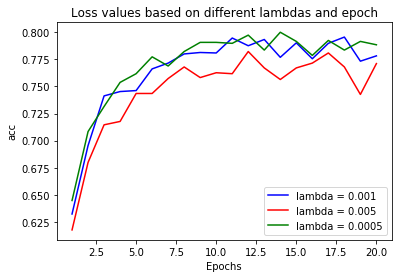

In [70]:
plt.clf()   # clear figure

plt.plot(all_results_df.loc[all_results_df['lamdas']==lambdas[0],'epochs' ], all_results_df.loc[all_results_df['lamdas']==lambdas[0],'accuracy' ], 'b', label='lambda = 0.001', color = 'blue')
plt.plot(all_results_df.loc[all_results_df['lamdas']==lambdas[0],'epochs' ], all_results_df.loc[all_results_df['lamdas']==lambdas[1],'accuracy' ], 'b', label='lambda = 0.005', color = 'red')
plt.plot(all_results_df.loc[all_results_df['lamdas']==lambdas[0],'epochs' ], all_results_df.loc[all_results_df['lamdas']==lambdas[2],'accuracy' ], 'b', label='lambda = 0.0005', color = 'green')

plt.title('Loss values based on different lambdas and epoch')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

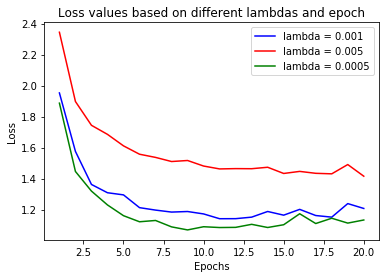

In [71]:
plt.clf()   # clear figure

plt.plot(all_results_df.loc[all_results_df['lamdas']==lambdas[0],'epochs' ], all_results_df.loc[all_results_df['lamdas']==lambdas[0],'loss' ], 'b', label='lambda = 0.001', color = 'blue')
plt.plot(all_results_df.loc[all_results_df['lamdas']==lambdas[0],'epochs' ], all_results_df.loc[all_results_df['lamdas']==lambdas[1],'loss' ], 'b', label='lambda = 0.005', color = 'red')
plt.plot(all_results_df.loc[all_results_df['lamdas']==lambdas[0],'epochs' ], all_results_df.loc[all_results_df['lamdas']==lambdas[2],'loss' ], 'b', label='lambda = 0.0005', color = 'green')

plt.title('Loss values based on different lambdas and epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()